In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.mlab as mlab
from scipy import stats
import pandas as pd
import math
from scipy.optimize import curve_fit

In [2]:
#POTREMMO PLOTTARE ANDAMENTO DI F IN FUNZIONE DI R

# PARTE 1

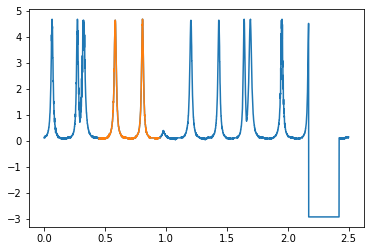

In [3]:
df1 = pd.read_csv('F0006CH2.CSV', usecols=[3,4])
df1
plt.plot(df1['t'],df1['V'])
data_extracted=np.asarray(df1[450:950]) #fare ciclo for per controllo dei dati da dove partire !!!
data_extracted

plt.plot(data_extracted[:,0],data_extracted[:,1])

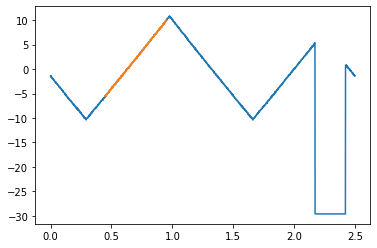

In [4]:
dfpz = pd.read_csv('F0006CH1.CSV', usecols=[3,4])
dfpz
plt.plot(dfpz['t'],dfpz['V'])
pz=np.asarray(dfpz[450:950]) #fare ciclo for per controllo dei dati da dove partire !!!
pz


plt.plot(pz[:,0],pz[:,1])
#plt.plot(data_extracted[:,0],data_extracted[:,1])

b = 0.9239978392911156
fteo = 14.049629462081455
I_0  = 4.66


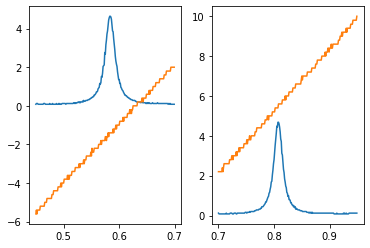

In [5]:
#PICCO 1
picco1=np.asarray(df1[450:700])
picco1pz=np.asarray(dfpz[450:700])

plt.subplot(1,2,1)

plt.plot(picco1[:,0],picco1[:,1])
plt.plot(picco1pz[:,0],picco1pz[:,1])


maxpos1=picco1[:,1].tolist().index(max(picco1[:,1].tolist()))
#print(picco1pz[:,1][maxpos1])

#PICCO 2

plt.subplot(1,2,2)

picco2=np.asarray(df1[700:950])
picco2pz=np.asarray(dfpz[700:950])

plt.plot(picco2[:,0],picco2[:,1])
plt.plot(picco2pz[:,0],picco2pz[:,1])

maxpos2=picco2[:,1].tolist().index(max(picco2[:,1].tolist()))
#print(picco2pz[:,1][maxpos2])

b=2*math.pi/(picco2pz[:,1][maxpos2]-picco1pz[:,1][maxpos1])

print('b =',2*math.pi/(picco2pz[:,1][maxpos2]-picco1pz[:,1][maxpos1]))

rfteo=math.pi*(0.80**0.5)/(1-0.8)
print('fteo =',rfteo)

# a è Imax su I0 e lo moltiplico per Io mi rimane solo Imax vedi prime lezioni

a=(max(picco2[:,1].tolist())+max(picco1[:,1].tolist()))/2
print('I_0  =', a)

In [6]:
#incertezze su data extracted [:,1]
sigmay2 = np.sqrt((data_extracted[:,1] * 0.04)**2 + 0.19**2)
print("sigmay2: ",np.shape(sigmay2))

sigmay2:  (500,)


Text(0.5, 0, 'V piezo')

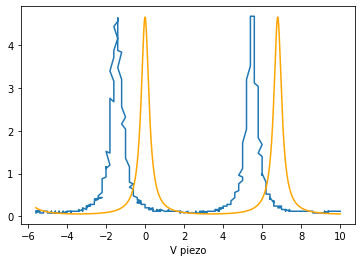

In [7]:
def Intensity(V, Fexp, V0):
    I=[]
    for i in range (0, len(V)):
        k=a*(1/(1+4*((Fexp/math.pi)**2)*math.sin((V[i] + V0)*b/2)**2))
        I.append(k)
    return I

xfit = np.linspace(pz[0,1],10,10000)
plt.plot(pz[:,1], data_extracted[:,1]) #PERCHE' offset RISPETTO AL TEORICO? ##DELTA R?
plt.plot(xfit, Intensity(xfit, rfteo, 0), color='orange') #V0 = 1.5
plt.xlabel('V piezo')

F_exp =  11.124356876478638
V0 =  1.3687878789410888
Sigma F_exp =  0.014907069616888965
Sigma V0 =  1.5433046786785207e-05


Text(0.5, 0, 'V piezo')

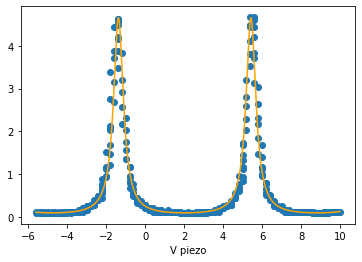

In [8]:
#Incertezze voltaggio piezo elettrico??

sigmapz=((0.03*pz[:,1])**2+(0.1*5)**2)**0.5 #momentaneooo

#FIT SU Fexp che meglio aprrossima i dati

popt, pcov = curve_fit(Intensity, pz[:,1], data_extracted[:,1], sigma=sigmay2, absolute_sigma=True, bounds=([0.,0],[20.,+1.5]))
print('F_exp = ', popt[0])
print('V0 = ', popt[1])
print('Sigma F_exp = ', pcov[0,0])
print('Sigma V0 = ', pcov[1,1])

plt.scatter(pz[:,1], data_extracted[:,1]) #PERCHE' offset RISPETTO AL TEORICO? ##DELTA R?
plt.plot(xfit, Intensity(xfit, popt[0], popt[1]), color='orange') #V0 = 1.5
plt.xlabel('V piezo')

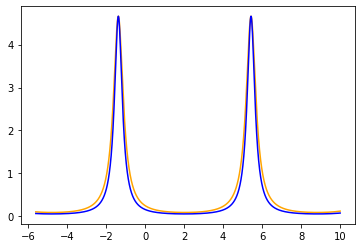

In [9]:
plt.plot(xfit, Intensity(xfit, popt[0], popt[1]), color='orange') #V0 = 1.5
plt.plot(xfit, Intensity(xfit, rfteo, popt[1]), color='blue') #V0 = 1.5

In [10]:
#fit con teorica
ychi2= Intensity(pz[:,1], rfteo, popt[1])
ychi2 = np.asarray(ychi2)

res2 = np.asarray(Intensity(pz[:,1], popt[0], popt[1])) - ychi2
chisq2 = np.sum((res2/(sigmay2))**2)
nobs2 = 500
df2 = nobs2
print("chisq2 =",chisq2,"df2 =",df2)
#print((res2/sigmay2)**2)

chisq2 = 384.23245494662984 df2 = 500


In [11]:
#fit con dati

res2 = np.asarray(Intensity(pz[:,1], popt[0], popt[1])) - data_extracted[:,1]
chisq2 = np.sum((res2/(sigmay2))**2)
nobs2 = 500 - 2
df2 = nobs2
print("chisq2 =",chisq2,"df2 =",df2)
#print((res2/sigmay2)**2)

chisq2 = 585.7002529418141 df2 = 498


In [12]:
#teorica con dati
ychi2= Intensity(pz[:,1], rfteo, popt[1])
ychi2 = np.asarray(ychi2)

res2 = np.asarray(Intensity(pz[:,1], popt[0], popt[1])) - ychi2
chisq2 = np.sum((res2/(sigmay2))**2)
nobs2 = 500
df2 = nobs2
print("chisq2 =",chisq2,"df2 =",df2)
#print((res2/sigmay2)**2)

chisq2 = 384.23245494662984 df2 = 500


In [13]:
def Intensity0(V, Fexp, V0, I0):
    I=[]
    for i in range (0, len(V)):
        k=I0*(1/(1+4*((Fexp/math.pi)**2)*math.sin((V[i] + V0)*b/2)**2))
        I.append(k)
    return I

F_exp =  10.455337597300275
Sigma F_exp =  0.028588154063164978
V0 =  1.3696870397507495
Sigma V0 =  1.8471262705685835e-05
I0 =  4.33812751785114
Sigma I0 =  0.003285052712004236


(-5.6, 10)

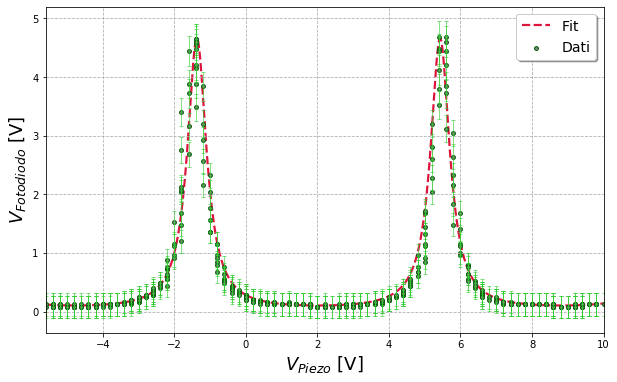

In [23]:
#SENZA FIT SU I0

yI0 = np.full(len(xfit), a)
sigmapz=((0.03*pz[:,1])**2+(0.1*5)**2)**0.5 #momentaneooo

#FIT SU Fexp che meglio aprrossima i dati

popt, pcov = curve_fit(Intensity0, pz[:,1], data_extracted[:,1], sigma=sigmay2, absolute_sigma=True, bounds=([0.,0.,0.],[20.,+1.5,8.]))
print('F_exp = ', popt[0])
print('Sigma F_exp = ', pcov[0,0])
print('V0 = ', popt[1])
print('Sigma V0 = ', pcov[1,1])
print('I0 = ', popt[2])
print('Sigma I0 = ', pcov[2,2])

fig, ax = plt.subplots(figsize=(10, 6))

#ax.plot(xfit, yI0, ls='--', lw='1', c='salmon', label='$I_0$ misurato')
ax.errorbar(pz[:,1], data_extracted[:,1], sigmay2, linestyle="None", color='limegreen', elinewidth=0.6 ,capsize=2,capthick=0.6, zorder=2)
ax.plot(xfit, Intensity(xfit, popt[0], popt[1]), color='crimson', ls='--', linewidth=2.2, label='Fit', zorder=0) #V0 = 1.5
#plt.plot(xfit, Intensity(xfit, rfteo, popt[1]), color='gold', ls='--', linewidth=2.2, label='Teorica')
ax.scatter(pz[:,1], data_extracted[:,1], s=15, edgecolor='darkgreen', c='grey', label='Dati') #PERCHE' offset RISPETTO AL TEORICO? ##DELTA R?
ax.grid(linestyle='--')
#plt.title("Fit sui dati di $V_0$ e  $\mathscr{F}$", fontsize=18)
ax.legend(loc='upper center', bbox_to_anchor=(0.915, 1), fancybox=True, shadow=True, ncol=1, fontsize=14, facecolor='white')
plt.xlabel('$V_{Piezo}$ [V]', fontsize=18)
plt.ylabel('$V_{Fotodiodo}$ [V]', fontsize=18)
plt.xlim(pz[0,1],10)

#ax.fill_between(pz[:,1], data_extracted[:,1] - sigmay2, data_extracted[:,1] + sigmay2, color='limegreen', alpha=0.3)


#------> https://stackoverflow.com/questions/12957582/plot-yerr-xerr-as-shaded-region-rather-than-error-bars

(-5.6, 10)

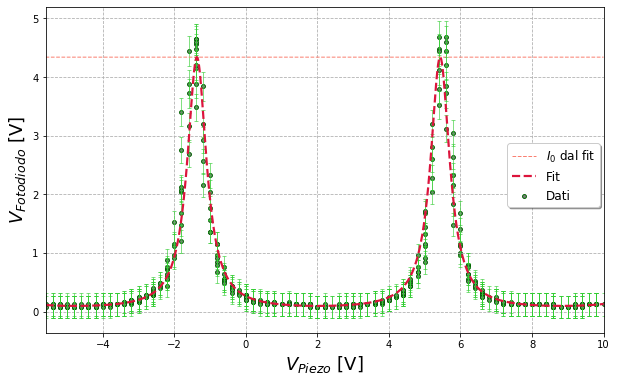

In [30]:
#CON FIT SU I0
yI0 = np.full(len(xfit), popt[2])

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(xfit, yI0, ls='--', lw='1', c='salmon', label='$I_0$ dal fit')
ax.errorbar(pz[:,1], data_extracted[:,1], sigmay2, linestyle="None", color='limegreen', elinewidth=0.6 ,capsize=2,capthick=0.6, zorder=2)
ax.plot(xfit, Intensity0(xfit, popt[0], popt[1], popt[2]), color='crimson', ls='--', linewidth=2.2, label='Fit') #V0 = 1.5
#plt.plot(xfit, Intensity0(xfit, rfteo, popt[1], popt[2]), color='gold', ls='--', linewidth=2.2, label='Teorica')
ax.scatter(pz[:,1], data_extracted[:,1], s=15, edgecolor='darkgreen', c='grey', label='Dati') #PERCHE' offset RISPETTO AL TEORICO? ##DELTA R?
ax.grid(linestyle='--')
#plt.title("Fit sui dati di $V_0$,  $\mathscr{F}$ e $I_0$", fontsize=18)
ax.legend(loc='upper center', bbox_to_anchor=(0.91, 0.6), fancybox=True, shadow=True, ncol=1, fontsize=12, facecolor='white')
plt.xlabel('$V_{Piezo}$ [V]', fontsize=18)
plt.ylabel('$V_{Fotodiodo}$ [V]', fontsize=18)
plt.xlim(pz[0,1],10)

In [31]:
#Chi quadro con I0
res2 = np.asarray(Intensity0(pz[:,1], popt[0], popt[1], popt[2])) - data_extracted[:,1]
chisq2 = np.sum((res2/(sigmay2))**2)
nobs2 = 500 - 3
df2 = nobs2
print("chisq2 =",chisq2,"df2 =",df2)
#print((res2/sigmay2)**2)

chisq2 = 554.253326895077 df2 = 497


F_exp =  10.455337597300275
Sigma F_exp =  0.028588154063164978
V0 =  1.3696870397507495
Sigma V0 =  1.8471262705685835e-05
I0 =  4.33812751785114
Sigma I0 =  0.003285052712004236


(-5.6, 10)

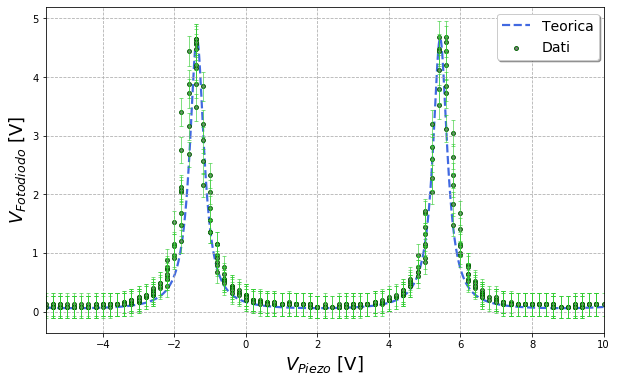

In [41]:
#TEORICA CON DATI

yI0 = np.full(len(xfit), a)
sigmapz=((0.03*pz[:,1])**2+(0.1*5)**2)**0.5 #momentaneooo

#FIT SU Fexp che meglio aprrossima i dati

popt, pcov = curve_fit(Intensity0, pz[:,1], data_extracted[:,1], sigma=sigmay2, absolute_sigma=True, bounds=([0.,0.,0.],[20.,+1.5,8.]))
print('F_exp = ', popt[0])
print('Sigma F_exp = ', pcov[0,0])
print('V0 = ', popt[1])
print('Sigma V0 = ', pcov[1,1])
print('I0 = ', popt[2])
print('Sigma I0 = ', pcov[2,2])

fig, ax = plt.subplots(figsize=(10, 6))

#ax.plot(xfit, yI0, ls='--', lw='1', c='salmon', label='$I_0$ misurato')
ax.errorbar(pz[:,1], data_extracted[:,1], sigmay2, linestyle="None", color='limegreen', elinewidth=0.6 ,capsize=2,capthick=0.6, zorder=2)
#ax.plot(xfit, Intensity(xfit, popt[0], popt[1]), color='crimson', ls='--', linewidth=2.2, label='Fit', zorder=0) #V0 = 1.5
plt.plot(xfit, Intensity(xfit, rfteo, popt[1]), color='royalblue', ls='--', linewidth=2.2, label='Teorica', zorder=0)
ax.scatter(pz[:,1], data_extracted[:,1], s=15, edgecolor='darkgreen', c='grey', label='Dati') #PERCHE' offset RISPETTO AL TEORICO? ##DELTA R?
ax.grid(linestyle='--')
#plt.title("Fit sui dati di $V_0$ e  $\mathscr{F}$", fontsize=18)
ax.legend(loc='upper center', bbox_to_anchor=(0.9, 1), fancybox=True, shadow=True, ncol=1, fontsize=14, facecolor='white')
plt.xlabel('$V_{Piezo}$ [V]', fontsize=18)
plt.ylabel('$V_{Fotodiodo}$ [V]', fontsize=18)
plt.xlim(pz[0,1],10)

#ax.fill_between(pz[:,1], data_extracted[:,1] - sigmay2, data_extracted[:,1] + sigmay2, color='limegreen', alpha=0.3)


#------> https://stackoverflow.com/questions/12957582/plot-yerr-xerr-as-shaded-region-rather-than-error-bars

# PARTE 2

In [ ]:
#CALCOLARE FEXP CON LE FORMULE DI DEL RE CON LA TENSIONE DEL PIEZO ELETTRICO

In [ ]:
FONDOSCALAv=np.asarray([1,1,1,1,0.500,0.200,1])#volt
FONDOSCALAfwhm=np.asarray([25.0,25.0,25.0,25.0,25.0,25.0,25.0])#millisecondi
FONDOSCALAfsr=np.asarray([50.0,50.0,50.0,50.0,100.0,50.0,50.0])

In [ ]:
VMAX1=np.asarray([4.56,3.40,2.96,2.32,0.680,0.824,3.24])
VFWHM1=np.asarray([2.28,1.76,1.56,1.16,0.360,0.368,1.48])
VFWHM2=np.asarray([2.24,1.60,1.48,1.08,0.320,0.472,1.76])
FWHM=np.asarray([20.0,18.0,15.0,18.0,16.0,14.0,14.0])
FSR=np.asarray([250.0,226.0,218.0,236.0,236.0,248.0,252.0])

#sFVm=((FONDOSCALAv*0.1)**2+(0.03*VMAX1)**2)**0.5
#sVfwh1=((FONDOSCALAv*0.1)**2+(0.03*VFWHM1)**2)**0.5
#sVfwh2=((FONDOSCALAv*0.1)**2+(0.03*VFWHM2)**2)**0.5
#sfwh=((FONDOSCALAfwhm*0.1)**2+(0.03*FWHM)**2)**0.5
#sfsr=((FONDOSCALAfsr*0.1)**2+(0.03*FSR)**2)**0.5

sFVm=FONDOSCALAv*0.05
sVfwh1=FONDOSCALAv*0.05
sVfwh2=FONDOSCALAv*0.05
sfwh=FONDOSCALAfwhm*0.05
sfsr=FONDOSCALAfsr*0.05


print(sFVm)
print(sVfwh1)
print(sVfwh2)
print(sfwh)
print(sfsr)

In [ ]:
#COEFFICIENTE DI FINESSE SPERIMENTALE
R=np.asarray([0.80,(0.80*0.85)**0.5,(0.80*0.92)**0.5,(0.85*0.92)**0.5,(0.85*0.98)**0.5,(0.92*0.98)**0.5,(0.92*0.95)**0.5])

FTEO=math.pi*((R)**0.5)/(1-R)
FEXP=FSR/FWHM

sigmafexp=((sfsr/FSR)**2+(sfwh/FWHM)**2)**0.5*FEXP

print(FEXP)
print(sigmafexp)

#PLOT MOMENTANEO
fig, ax = plt.subplots(figsize=(10, 6))


ax.scatter(1/(FTEO**2), 1/(FEXP**2), label='$Punti$ $Sperimentali$',color='lightgreen', edgecolor='green')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.), fancybox=True, shadow=True, ncol=5, fontsize=11, facecolor='white')
ax.set_title('', fontsize=15, backgroundcolor='lightyellow', position=(.5, 1.02))
ax.grid(linestyle='--')
ax.set_xlabel('1/$F^2_{teo}$', fontsize=18)
ax.set_ylabel('1/$F^2_{exp}$', fontsize=18)
ax.set_xlim(-0.001,0.007)


sigmay=((4*(sigmafexp/FEXP)**2)**0.5)*(1/(FEXP**2))

#sigmay=[0.0008,0.0008,0.0008,0.0008,0.0008,0.0008,0.0008]

In [ ]:
print('[')
for r in range(0,len(1/FTEO**2)-1):
    print('(',format(1/FTEO[r]**2, ".6f"),',',format(1/FEXP[r]**2, ".6f"),',',format(sigmay[r],".7f"),');')
print('(',format(1/FTEO[len(FTEO)-1]**2, ".6f"),',',format(1/FEXP[len(FTEO)-1]**2, ".6f"),',',format(sigmay[len(FTEO)-1],".7f"),')')
print(']')

In [ ]:
#RISULTATI MINIMI QUADRATI
m=0.65224140656793
c=0.0035440791067147
sigmam=0.18000347899579
sigmac=0.00047618552838403

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

x=np.linspace(-0.001,0.007,1000)

y=m*x+c
y1=(m+sigmam)*x+c
y2=(m-sigmam)*x+c

ax.plot(x,y, ls='-', color='black',zorder=1, label='$m$ $\\pm$ $\\sigma$')
ax.plot(x,y1, ls='--', color='orange',zorder=1)
ax.plot(x,y2, ls='--', color='orange',zorder=1)

ax.errorbar(1/(FTEO**2), 1/(FEXP**2), sigmay, linestyle="None", color='black', elinewidth=0.6 ,capsize=2,capthick=0.6, zorder=2)

ax.scatter(1/(FTEO**2), 1/(FEXP**2), label='$Punti$ $Sperimentali$',color='lightgreen', edgecolor='green',zorder=2)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.), fancybox=True, shadow=True, ncol=5, fontsize=12, facecolor='white')
#ax.set_title('********REFLECTING FINESSE O FINESSE SIMBOLO? INCERTEZZE??********', fontsize=15, backgroundcolor='lightyellow', position=(.5, 1.02))
ax.grid(linestyle='--')
ax.set_xlabel('1/$\mathscr{F}^2_{teo}$', fontsize=18)
ax.set_ylabel('1/$\mathscr{F}^2_{exp}$', fontsize=18)
ax.set_xlim(0,0.006)
ax.set_ylim(-0.005,0.015)

In [ ]:
#CHISQUARE FIT

ychi=m*1/(FTEO**2)+c

res =  1/(FEXP**2) - ychi
chisq = np.sum((res/(sigmay))**2)
nobs = 7 - 2
df = nobs
print("chisq =",chisq,"df =",df)
print((res/sigmay)**2)

#???? SULLE INCERTEZZE DECIDERE

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

rx=np.linspace(0.7850,0.955,1000)

ax.plot(rx, math.pi*((rx)**0.5)/(1-rx), label='',color='plum', zorder=0)
ax.scatter(R, FTEO, label='$\mathscr{F}_{teo}$', color='plum', edgecolor='purple', zorder=1)
ax.scatter(R, FEXP, label='$\mathscr{F}_{exp}$',color='lightgreen', edgecolor='green')

ax.legend(loc='upper center', bbox_to_anchor=(0.1, 1.), fancybox=True, shadow=True, ncol=1, fontsize=16, facecolor='white')
#ax.set_title('*****FINESSE IN FUNZIONE DELLA RIFLETTIVITA******', fontsize=15, backgroundcolor='lightyellow', position=(.5, 1.02))
ax.grid(linestyle='--')
ax.set_xlabel('$R$', fontsize=24)
ax.set_ylabel('$\mathscr{F}$', fontsize=24)

ax.set_xlim(0.7850,0.954)

In [ ]:
#PUNTO 2 CONTRAST RATIO
CRteo=(1+R)**2/(1-R)**2
print(CRteo)

In [ ]:
df = pd.read_csv('080_080/F0007CH2.CSV', usecols=[3,4])
#plt.plot(df['t'],df['V'])
data_extracted=np.asarray(df[0:1750])
#plt.plot(data_extracted[:,0],data_extracted[:,1])
Vmin8080 = min(data_extracted[:,1])
print(Vmin8080)

df = pd.read_csv('080_085(terzo o quarto picco)/F0009CH2.CSV', usecols=[3,4])
#plt.plot(df['t'],df['V'])
data_extracted=np.asarray(df[0:2050])
#plt.plot(data_extracted[:,0],data_extracted[:,1])
Vmin8085 = min(data_extracted[:,1])
print(Vmin8085)

df = pd.read_csv('080_092(SEMPRE QUELLI A DESTRA)/F0010CH2.CSV', usecols=[3,4])
#plt.plot(df['t'],df['V'])
data_extracted=np.asarray(df[350:1950])
#plt.plot(data_extracted[:,0],data_extracted[:,1])
Vmin8092 = min(data_extracted[:,1])
print(Vmin8092)# ?????

df = pd.read_csv('085_092(terzo e quarto)/F0011CH2.CSV', usecols=[3,4])
#plt.plot(df['t'],df['V'])
data_extracted=np.asarray(df[350:1950])
#plt.plot(data_extracted[:,0],data_extracted[:,1])
Vmin8592 = min(data_extracted[:,1])
print(Vmin8592)#

df = pd.read_csv('085_098/F0012CH2.CSV', usecols=[3,4])
#plt.plot(df['t'],df['V'])
data_extracted=np.asarray(df[350:1950])
#plt.plot(data_extracted[:,0],data_extracted[:,1])
Vmin8598 = min(data_extracted[:,1])
print(Vmin8598)# NEGATIVO OSCILLAZIONI OCCHIO

df = pd.read_csv('092_095/F0014CH2.CSV', usecols=[3,4])
#plt.plot(df['t'],df['V'])
data_extracted=np.asarray(df[650:1950])
#plt.plot(data_extracted[:,0],data_extracted[:,1])
Vmin9295 = min(data_extracted[:,1])
print(Vmin9295)# NEGATIVO OSCILLAZIONI OCCHIO

df = pd.read_csv('092_098/F0013CH2.CSV', usecols=[3,4])
plt.plot(df['t'],df['V'])
data_extracted=np.asarray(df[650:1950])
plt.plot(data_extracted[:,0],data_extracted[:,1])
Vmin9298 = min(data_extracted[:,1])
print(Vmin9298)# NEGATIVO OSCILLAZIONI OCCHIO

#CONTROLLARE MINIMO CON EXCEL????

In [ ]:
Vmin=np.asarray([0.08,0.04,0.04,0.02,0.02,0.04,0.008])
CR=VMAX1/Vmin
print(CR)#????????

R=np.asarray([0.80,(0.80*0.85)**0.5,(0.80*0.92)**0.5,(0.85*0.92)**0.5,(0.85*0.98)**0.5,(0.92*0.95)**0.5,(0.92*0.98)**0.5])
CRteo=(1+R)**2/(1-R)**2

print(CRteo)

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(R, CRteo, label='$\mathcal{CR}_{teo}$', color='orange', edgecolor='red')
ax.scatter(R, CR, label='$\mathcal{CR}_{exp}$', color='lightblue', edgecolor='blue')

ax.legend(loc='upper center', bbox_to_anchor=(0.1, 1.), fancybox=True, shadow=True, ncol=1, fontsize=16, facecolor='white')
#ax.set_title('*****Confronto Contrast Ratio******', fontsize=15, backgroundcolor='lightyellow', position=(.5, 1.02))
ax.grid(linestyle='--')
ax.set_xlabel('$R$', fontsize=24)
ax.set_ylabel('$\mathcal{CR}$', fontsize=24)


Vminteo=VMAX1/CRteo
print(Vminteo)

# PARTE 3